<a href="https://colab.research.google.com/github/UTakeuchi/PDsimulator/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt

# Q学習エージェント

In [ ]:
def greedy_probs(Q, state, epsilon=0, action_size=2):
    qs = [Q[(state, action)] for action in range(action_size)]
    max_action = np.argmax(qs)
    base_prob = epsilon / action_size
    action_probs = {action: base_prob for action in range(action_size)}  #{0: ε/4, 1: ε/4, 2: ε/4, 3: ε/4}
    action_probs[max_action] += (1 - epsilon)
    return action_probs

In [ ]:
class Agent:
    def __init__(self):
        self.gamma = 0.9
        self.alpha = 0.8
        self.epsilon = 0.1
        self.action_size = 2
        self.income = 0 #所得
        #self.rep = 'g' #評判(good or bad)    

        random_actions = {0: 0.5, 1: 0.5}
        self.pi = defaultdict(lambda: random_actions)
        self.b = defaultdict(lambda: random_actions)
        self.Q = defaultdict(lambda: 0)
    
    def get_action(self, state):
        action_probs = self.b[state]
        actions = list(action_probs.keys())
        probs = list(action_probs.values())
        return np.random.choice(actions, p=probs)

    def inc_update(self, reward):
        self.income += reward #income update

    def update(self, state, action, reward, next_state):
        next_qs = [self.Q[next_state, a] for a in range(self.action_size)]
        next_q_max = max(next_qs)
        
        target = reward + self.gamma * next_q_max
        self.Q[state, action] += self.alpha * (target - self.Q[state, action])

        self.pi[state] = greedy_probs(self.Q, state, epsilon=0)
        self.b[state] = greedy_probs(self.Q, state, self.epsilon)

# Prisoner's dillema game

In [23]:
class PDGame:
    def __init__(self):
        self.action_space = [0, 1]
        self.action_meaning = {
            0: "Defect",
            1: "Cooperate",
        }
        self.b = 5 #benefit
        self.c = 1 #cost
        self.u1 = {(1, 1):self.b - self.c, (1, 0):-self.c, (0, 1):self.b, (0, 0):0}
        self.u2 = {(1, 1):self.b - self.c, (1, 0):self.b, (0, 1):-self.c, (0, 0):0}
    
    def matching():
        return None
        
    def reward(self, a1, a2):
        return self.u1[(a1,a2)], self.u2[(a1,a2)]
    

# シミュレーションの実行

state:(0, 0), policy:{0: 1.0, 1: 0.0}
state:(-1, 10), policy:{0: 1.0, 1: 0.0}
state:(-2, 20), policy:{0: 0.0, 1: 1.0}
state:(7, 29), policy:{0: 0.0, 1: 1.0}
state:(16, 38), policy:{0: 0.0, 1: 1.0}
state:(25, 47), policy:{0: 1.0, 1: 0.0}
state:(24, 57), policy:{0: 1.0, 1: 0.0}
state:(23, 67), policy:{0: 1.0, 1: 0.0}
state:(22, 77), policy:{0: 0.0, 1: 1.0}
state:(31, 86), policy:{0: 0.0, 1: 1.0}
state:(40, 95), policy:{0: 1.0, 1: 0.0}
state:(50, 94), policy:{0: 1.0, 1: 0.0}
state:(60, 93), policy:{0: 1.0, 1: 0.0}
state:(70, 92), policy:{0: 1.0, 1: 0.0}
state:(80, 91), policy:{0: 0.0, 1: 1.0}
state:(89, 100), policy:{0: 1.0, 1: 0.0}
state:(88, 110), policy:{0: 1.0, 1: 0.0}
state:(98, 109), policy:{0: 1.0, 1: 0.0}
state:(97, 119), policy:{0: 1.0, 1: 0.0}
state:(107, 118), policy:{0: 0.0, 1: 1.0}
state:(116, 127), policy:{0: 1.0, 1: 0.0}
state:(115, 137), policy:{0: 0.0, 1: 1.0}
state:(124, 146), policy:{0: 1.0, 1: 0.0}
state:(134, 145), policy:{0: 0.0, 1: 1.0}
state:(143, 154), policy:{0: 

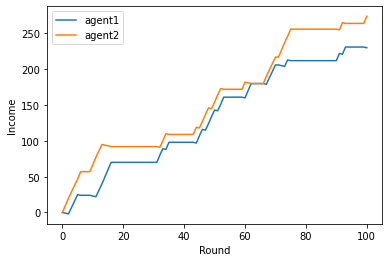

In [22]:
env = PDGame()
agent1 = Agent()
agent2 = Agent()

income1_history = [0]
income2_history = [0]
rounds = 100
for round in range(rounds):
    state = (agent1.income, agent2.income)
    
    a1 = agent1.get_action(state)
    a2 = agent2.get_action(state)
    r1, r2 = env.reward(a1, a2)

    next_state = (agent1.inc_update(r1), agent2.inc_update(r2))
    agent1.update(state, a1, r1, next_state)
    agent2.update(state, a2, r2, next_state)
    income1_history.append(agent1.income)
    income2_history.append(agent2.income)

for key, value in agent1.pi.items():
    print('state:{}, policy:{}'.format(key, value))
print(len(agent1.pi))

def plot_total_income(history1, history2):
    plt.xlabel('Round')
    plt.ylabel('Income')
    plt.plot(range(len(history1)), history1, label='agent1')
    plt.plot(range(len(history2)), history2, label='agent2')
    #plt.ylim(0,200)
    plt.legend()
    plt.show()

plot_total_income(income1_history, income2_history)